# INFO 103: Introduction to data science <br> Demo \# 6: EDA <br> Author: JRW

In [2]:
import json
import numpy as np
import re
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
%matplotlib inline

### Mission
This workbook presents an example of an early-stage analysis for a data science project. Exploratory data analysis (EDA) is an important first step when encountering a new data set, with specific attention to data consistency evaluation, description, and hypothesis generation. Since this workbook starts with a professionally-curated data set it will primarily focus on the latter two directions. However, it is not an uncommon outcome for EDA to result in a return to pre-processing and data collection.

#### Yelp! Dataset Challenge
In this workbook we'll be using a portion of the current (13th round) Yelp! academic data set. Every year, Yelp! releases a sample of their data in an academic challenge, where teams of students are encouraged to develop novel work, submitted for awards and prizes. This series of academic challenges has led to hundreds of academic papers and resulted in the awards that total over $50,000. More information on the present round (submissions due December 31st) can be found here:

* https://www.yelp.com/dataset

#### Data
This year's data set includes 6.7 million reviews and 1.2 million tips by 1.6 million users for 192 thousand businesses. This is a highly-varietal data set with 1.2 million business attributes, including business hours, parking availability, and social ambience. Additionally, this years data set includes over 200,000 user images depiction aspects of the covered businesses.

To get the data, please visit the following page:

* https://www.yelp.com/dataset/documentation/main

#### What are we looking at here?
It would be difficult to cover all aspects of the data set, which comes in several json files (linked tables). For sake of size and simplicity we'll focus only on the user-level data, which excludes the actual business reviews and images. With the user-level data, our immediate interest will focus on developing hypotheses to answer the question: what user features correspond to high levels of social connectivity? A result of this investigation might help me to figure out how to make friends on a social network!

#### Let's start by looking at one user
What different features are present for each user in this table? What do the different fields mean? Is there a data dictionary?

In [4]:
with open("user.json", "r") as f:
    for line in f:
        user = json.loads(line)
        break

In [5]:
user

{'user_id': 'ntlvfPzc8eglqvk92iDIAw',
 'name': 'Rafael',
 'review_count': 553,
 'yelping_since': '2007-07-06 03:27:11',
 'useful': 628,
 'funny': 225,
 'cool': 227,
 'elite': '',
 'friends': 'oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg, IkRib6Xs91PPW7pon7VVig, A8Aq8f0-XvLBcyMk2GJdJQ, eEZM1kogR7eL4GOBZyPvBA, e1o1LN7ez5ckCpQeAab4iw, _HrJVzFaRFUhPva8cwBjpQ, pZeGZGzX-ROT_D5lam5uNg, 0S6EI51ej5J7dgYz3-O0lA, woDt8raW-AorxQM_tIE2eA, hWUnSE5gKXNe7bDc8uAG9A, c_3LDSO2RHwZ94_Q6j_O7w, -uv1wDiaplY6eXXS0VwQiA, QFjqxXn3acDC7hckFGUKMg, ErOqapICmHPTN8YobZIcfQ, mJLRvqLOKhqEdkgt9iEaCQ, VKX7jlScJSA-ja5hYRw12Q, ijIC9w5PRcj3dWVlanjZeg, CIZGlEw-Bp0rmkP8M6yQ9Q, OC6fT5WZ8EU7tEVJ3bzPBQ, UZSDGTDpycDzrlfUlyw2dQ, deL6e_z9xqZTIODKqnvRXQ, 5mG2ENw2PylIWElqHSMGqg, Uh5Kug2fvDd51RYmsNZkGg, 4dI4uoShugD9z84fYupelQ, EQpFHqGT9Tk6YSwORTtwpg, o4EGL2-ICGmRJzJ3GxB-vw, s8gK7sdVzJcYKcPv2dkZXw, vOYVZgb_GVe-kdtjQwSUHw, wBbjgHsrKr7BsPBrQwJf2w, p59u2EC_qcmCmLeX1jCi5Q, VSAZI1eHDrOPRWMK4Q2DIQ, efMfeI_dkhpeGykaRJqxfQ, x6qYcQ8_i0mMDzSL

#### That's a lot of info about one user
The 'friends' field is a whole list of other users, so let's just take some numeric quantities for now, reducing 'friends' to just the number of friends.

In [6]:
#printing the user details
print("name: ", user["name"])
print("id: ", user["user_id"])
print("average stars in rating: ", user["average_stars"])
print("number of friends: ", len(user["friends"]))
#there is a mistake in code here. As it is not a list, this will return the number of characters in this variable
print("reviews written: ", user['review_count'])
print("on Yelp since: ", user['yelping_since'])

name:  Rafael
id:  ntlvfPzc8eglqvk92iDIAw
average stars in rating:  3.57
number of friends:  1078
reviews written:  553
on Yelp since:  2007-07-06 03:27:11


#### To make some generalizations, we need to get this data for all of the users
For our focus, I have simplified the data set to only record friend counts, instead of the full lists of friends. This removes the network structure, but preserves some key information on popularity. 

In [7]:
users = []
with open("user.json", "r",encoding='utf-8') as f:
    for line in f:
        user = json.loads(line)
        user["friends"] = len(user["friends"])
        user["elite"] = len(user["elite"])
        users.append(user)

#### Now let's sort our data to see how the least/most popular rate
What's special about the most popular people?
What's different about the least popular people?

In [8]:
users = sorted(users, key=lambda x: x["friends"], reverse=True)

In [9]:
users[0:2]

[{'user_id': 'qVc8ODYU5SZjKXVBgXdI7w',
  'name': 'Walker',
  'review_count': 556,
  'yelping_since': '2007-01-25 16:47:26',
  'useful': 7188,
  'funny': 1256,
  'cool': 5982,
  'elite': 4,
  'friends': 359878,
  'fans': 257,
  'average_stars': 3.91,
  'compliment_hot': 250,
  'compliment_more': 65,
  'compliment_profile': 55,
  'compliment_cute': 56,
  'compliment_list': 17,
  'compliment_note': 232,
  'compliment_plain': 844,
  'compliment_cool': 467,
  'compliment_funny': 467,
  'compliment_writer': 238,
  'compliment_photos': 179},
 {'user_id': 'iLjMdZi0Tm7DQxX1C1_2dg',
  'name': 'Ruggy',
  'review_count': 2431,
  'yelping_since': '2007-07-31 14:47:00',
  'useful': 35071,
  'funny': 26502,
  'cool': 28427,
  'elite': 54,
  'friends': 295678,
  'fans': 2516,
  'average_stars': 3.98,
  'compliment_hot': 2603,
  'compliment_more': 285,
  'compliment_profile': 272,
  'compliment_cute': 339,
  'compliment_list': 118,
  'compliment_note': 2282,
  'compliment_plain': 8963,
  'compliment_co

In [10]:
users[-3:-1]

[{'user_id': 'toAMthOzk2VDBgpW7Hu3eA',
  'name': 'Greg',
  'review_count': 1,
  'yelping_since': '2016-05-08 16:42:58',
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'elite': 0,
  'friends': 4,
  'fans': 0,
  'average_stars': 1.0,
  'compliment_hot': 0,
  'compliment_more': 0,
  'compliment_profile': 0,
  'compliment_cute': 0,
  'compliment_list': 0,
  'compliment_note': 0,
  'compliment_plain': 0,
  'compliment_cool': 0,
  'compliment_funny': 0,
  'compliment_writer': 0,
  'compliment_photos': 0},
 {'user_id': 'hNX_EqOMImKGUx4g1x532A',
  'name': 'RJ',
  'review_count': 2,
  'yelping_since': '2019-06-22 21:39:22',
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'elite': 0,
  'friends': 4,
  'fans': 0,
  'average_stars': 1.0,
  'compliment_hot': 0,
  'compliment_more': 0,
  'compliment_profile': 0,
  'compliment_cute': 0,
  'compliment_list': 0,
  'compliment_note': 0,
  'compliment_plain': 0,
  'compliment_cool': 0,
  'compliment_funny': 0,
  'compliment_writer': 0,
  'compliment_photos': 0}

#### First guess: angry reviewers don't make many friends
Here, let's see if we can answer the question "do you catch more flies with honey or vinegar?" To do this, we'll check to see if giving more stars gets you more friends.

#### Let's look at some descriptive statistics for the stars

In [11]:
mu = np.mean([user["average_stars"] for user in users])
sigma = np.std([user["average_stars"] for user in users])
print("average stars average: ", mu, "; average stars standard deviation: ", sigma)

average stars average:  3.64808682162825 ; average stars standard deviation:  1.1725251964093215


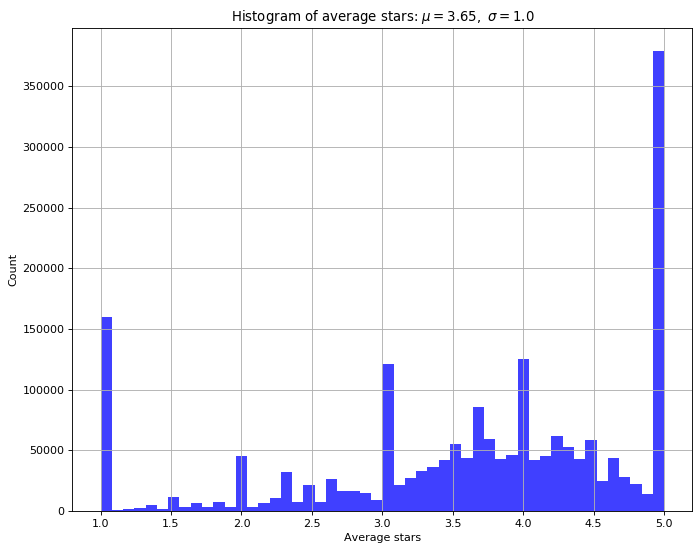

In [12]:
# let's make the figure big. num is something like an id. Visit https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["average_stars"] for user in users], 50, facecolor='blue', alpha=0.75)

plt.xlabel('Average stars')
plt.ylabel('Count')
plt.title(r'Histogram of average stars: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### Now let's do the same for the friend counts

In [14]:
mu = np.mean([user["friends"] for user in users])
sigma = np.std([user["friends"] for user in users])
print("average number of friends: ", mu, "; friends standard deviation: ", sigma)

average number of friends:  1097.6895924473074 ; friends standard deviation:  3307.865918211136


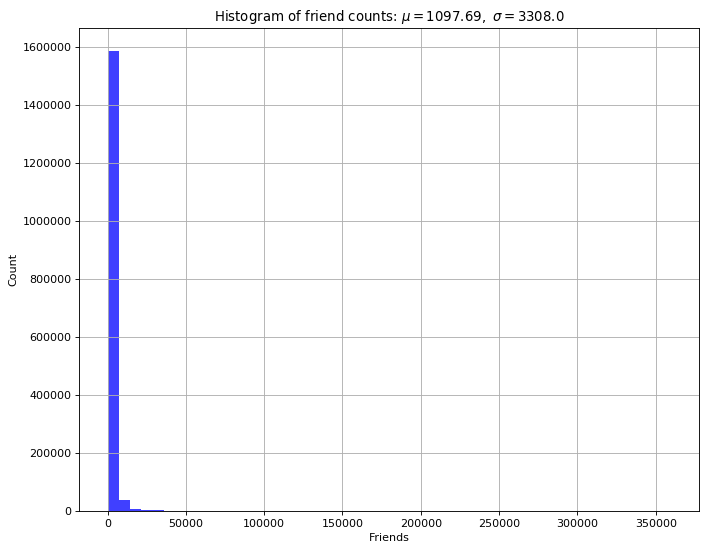

In [15]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["friends"] for user in users], 50, facecolor='blue', alpha=0.75)

plt.xlabel('Friends')
plt.ylabel('Count')
plt.title(r'Histogram of friend counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### Where did the data go? 
This is a heavy-tailed distribution with "extreme variation." Most people (over 1 million) have no friends at all, but someone has almost 15,000 friends!

In [16]:
print("least friends: ", min([user["friends"] for user in users]), "; most friends: ", max([user["friends"] for user in users]))

least friends:  4 ; most friends:  359878


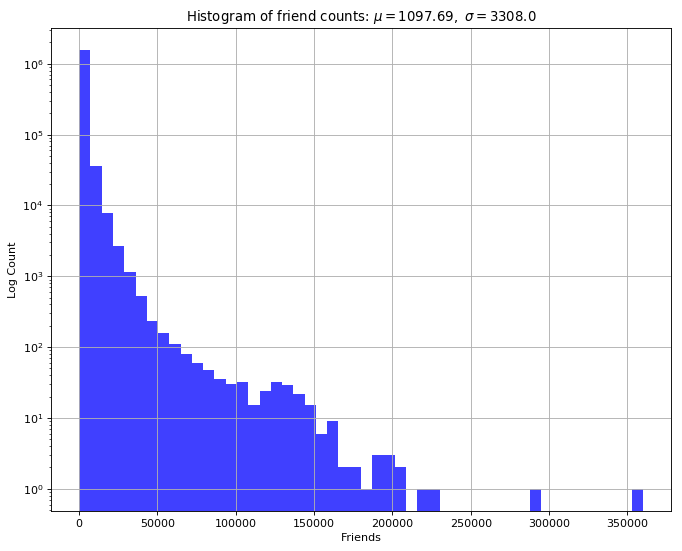

In [17]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["friends"] for user in users], 50, log="true", facecolor='blue', alpha=0.75)

plt.xlabel('Friends')
plt.ylabel('Log Count')
plt.title(r'Histogram of friend counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

#### So, let's compare the numbers of stars vs. the numbers of friends

In [14]:
print("correlation coefficient: ", np.corrcoef([user["average_stars"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  [[1.         0.06207136]
 [0.06207136 1.        ]]


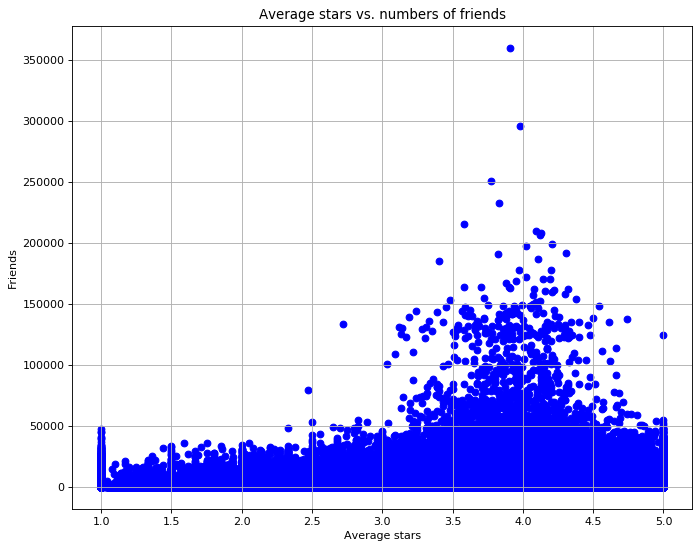

In [48]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the scatter plot
plt.scatter([user["average_stars"] for user in users], [user["friends"] for user in users], color='blue')

plt.xlabel('Average stars')
plt.ylabel('Friends')
plt.title('Average stars vs. numbers of friends')
plt.grid(True)

#### Side note: what's wrong with our scatter plot?
Scatter plots are great basic representations of two data dimensions simultaneously. They can help a researcher judge "by eye" if two features are related, but when the number of data points get large, information on density is easily lost. To represent density, we need a thrid dimension, which generally comes in the form of color. This can mean coloring points according to their local densities, or creating 2-dimensional bins and using color instead of bar heights in a kind of histogram, sometimes referred to as a "heat map". We'll go with the latter and hexagonal bins. What further information do we get out of this representation? Also, why have I logged the color scale?

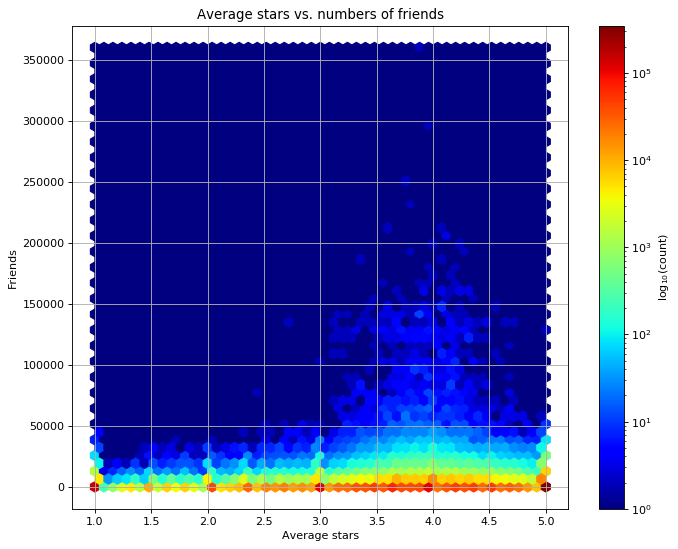

In [15]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["average_stars"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label(r'$\log_{10}($count$)$')

plt.xlabel('Average stars')
plt.ylabel('Friends')
plt.title('Average stars vs. numbers of friends')
plt.grid(True)

#### Anyway, that didn't work out!
If we were right, we would have seen a large correlation and friend counts going up (or down) with the average. This doesn't happen! If definitely takes time to make lots of friends, so maybe it's just how long you've been around that matter? But how do we turn dates into durations?

In [39]:
print("right now we have: ", users[0]['yelping_since'])

right now we have:  2007-01-25 16:47:26


So, we have to turn these strings into a datetime objects:

In [62]:
t = datetime.strptime(users[0]['yelping_since'], "%Y-%m-%d %H:%M:%S")
print(t)

2007-01-25 16:47:26


and then measure against the present:

In [64]:
print("days on Yelp!: ", (datetime.now() - t).days)

days on Yelp!:  4897


but really we have to do this for all of the users:

In [65]:
for user in users:
    user['yelpDays'] = (datetime.now() - datetime.strptime(user['yelping_since'], "%Y-%m-%d %H:%M:%S")).days

In [69]:
users[0]

{'user_id': 'qVc8ODYU5SZjKXVBgXdI7w',
 'name': 'Walker',
 'review_count': 556,
 'yelping_since': '2007-01-25 16:47:26',
 'useful': 7188,
 'funny': 1256,
 'cool': 5982,
 'elite': 4,
 'friends': 359878,
 'fans': 257,
 'average_stars': 3.91,
 'compliment_hot': 250,
 'compliment_more': 65,
 'compliment_profile': 55,
 'compliment_cute': 56,
 'compliment_list': 17,
 'compliment_note': 232,
 'compliment_plain': 844,
 'compliment_cool': 467,
 'compliment_funny': 467,
 'compliment_writer': 238,
 'compliment_photos': 179,
 'yelpDays': 4897}

#### Let's see how predictive the days on Yelp feature is!

In [70]:
mu = np.mean([user["yelpDays"] for user in users])
sigma = np.std([user["yelpDays"] for user in users])
print("average number of days on Yelp!: ", mu, "; Yelp! days standard deviation: ", sigma)

average number of days on Yelp!:  2236.4835615123257 ; Yelp! days standard deviation:  1013.063381669119


Notice there is a very different behavior going on here...

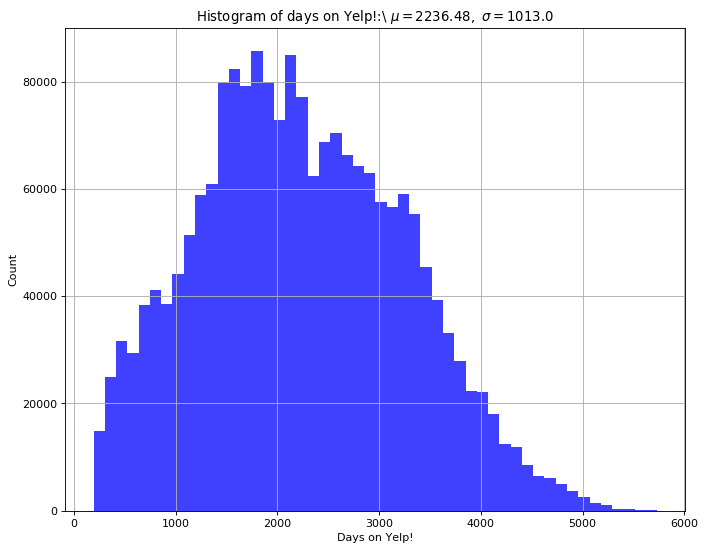

In [73]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["yelpDays"] for user in users], 50, facecolor='blue', alpha=0.75)

plt.xlabel('Days on Yelp!')
plt.ylabel('Count')
plt.title(r'Histogram of days on Yelp!:\ $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

In [74]:
print("correlation coefficient: ", np.corrcoef([user["yelpDays"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  0.08621885350193009


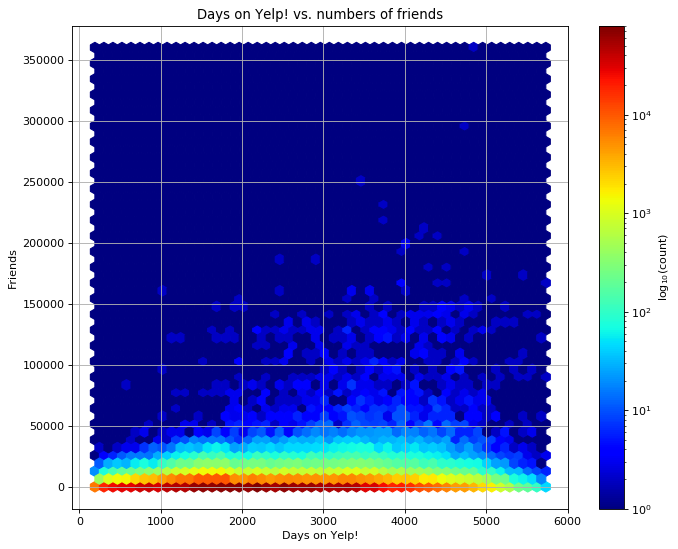

In [75]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["yelpDays"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Days on Yelp!')
plt.ylabel('Friends')
plt.title('Days on Yelp! vs. numbers of friends')
plt.grid(True)

#### What happened?
Well, the correlation went up a little, so it does help somewhat to have been on Yelp! for longer to gain more friends. However, there are still lots of people who have been on Yelp! for less time who are making friends fast. 


#### So, maybe it's about total activity, i.e., review counts

In [50]:
mu = np.mean([user["review_count"] for user in users])
sigma = np.std([user["review_count"] for user in users])
print("average number of reviews: ", mu, "; reviews standard deviation: ", sigma)

average number of reviews:  22.28769779945246 ; reviews standard deviation:  76.92234027179651


It looks like review counts are heavy tailed, too! This is like our friend counts!

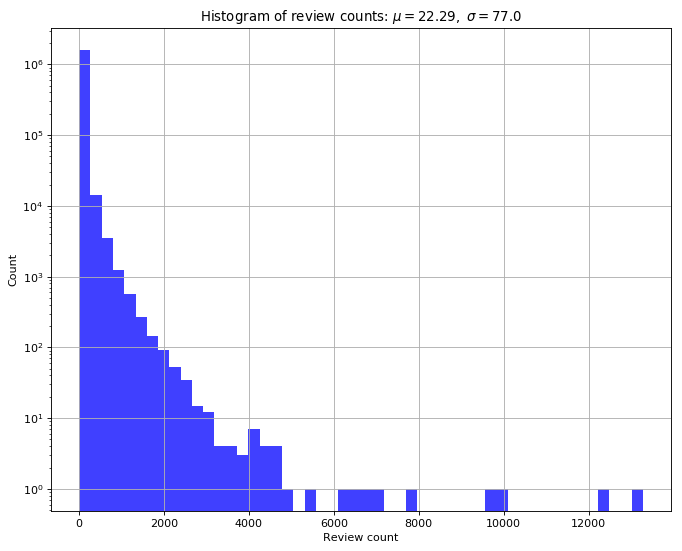

In [51]:
# let's make the figure big
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
n, bins, patches = plt.hist([user["review_count"] for user in users], 50, log=True, facecolor='blue', alpha=0.75)

plt.xlabel('Review count')
plt.ylabel('Count')
plt.title(r'Histogram of review counts: $\mu='+str(round(mu, 2))+',\ \sigma='+str(round(sigma))+'$')
plt.grid(True)

Let's compare the review counts against the friends counts

In [52]:
print("correlation coefficient: ", np.corrcoef([user["review_count"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  0.42304238065046135


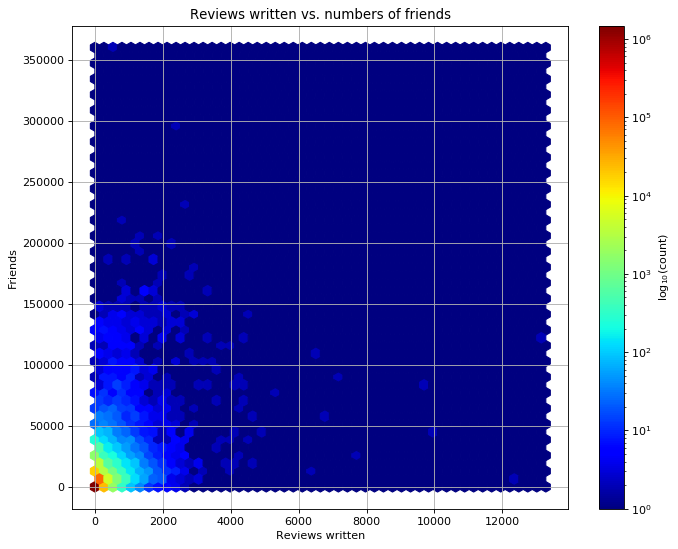

In [53]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["review_count"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Reviews written')
plt.ylabel('Friends')
plt.title('Reviews written vs. numbers of friends')
plt.grid(True)

#### Better, but there's still something missing!
So, our correlation went up to 0.4, which means there's something going on. It definitely helps to be more active on Yelp!, but that can't be all there is to it! To make friends, it must take quality, funny, or helpful reviews, etc., but what really matters? Let's do some exploration on two corners of the scatterplot, above. Let's compare (1) those who write some reviews but have lots of friends (top left corner) to (2) those who write lots of reviews but still don't seem to get as many friends (bottom right).

In [76]:
friendmakers = [
    user for user in users 
    if user['friends'] >= 4000 and user["review_count"] < 2000
]
overwriters = [
    user for user in users 
    if user['friends'] < 4000 and user["review_count"] >= 2000
]

Let's look at the averages across each feature between the two groups and divide by the numbers of reviews

In [77]:
for key in friendmakers[0].keys():
    try:
        float(friendmakers[0][key])
        print(key, np.mean([user[key]/float(user["review_count"]) for user in friendmakers if float(user["review_count"])!=0]))
    except ValueError:
        pass

review_count 1.0
useful 1.321397666087342
funny 0.49670117907875944
cool 0.6178082781943275
elite 0.013651078384406923
friends 1681.015029629509
fans 0.10209778349424047
average_stars 0.8290741375153209
compliment_hot 0.07057901210179345
compliment_more 0.010537670157759941
compliment_profile 0.005111056975161262
compliment_cute 0.006104395566492652
compliment_list 0.0014991414675785695
compliment_note 0.05016575370689036
compliment_plain 0.09320374407051131
compliment_cool 0.0926373349749104
compliment_funny 0.0926373349749104
compliment_writer 0.030266205556090525
compliment_photos 0.03404728311197269
yelpDays 388.81723065750776


In [78]:
for key in overwriters[0].keys():
    try:
        float(overwriters[0][key])
        print(key, np.mean([user[key]/float(user["review_count"]) for user in overwriters]))
    except ValueError:
        pass

review_count 1.0
useful 1.7780286918372348
funny 0.8489094842372656
cool 1.0986043050563294
elite 0.008197811759243332
friends 1.0010990382597462
fans 0.05075929587952617
average_stars 0.001674079147385546
compliment_hot 0.0472485205361402
compliment_more 0.013923223206122244
compliment_profile 0.01387105280088632
compliment_cute 0.007474964813919963
compliment_list 0.006395721443760351
compliment_note 0.060387241872837664
compliment_plain 0.14209696869460614
compliment_cool 0.09642505848077436
compliment_funny 0.09642505848077436
compliment_writer 0.03755200957253319
compliment_photos 0.03422840904332101
yelpDays 1.7612727366217413


#### Comparing the two

In [67]:
for key in overwriters[0].keys():
    try:
        float(overwriters[0][key])
        print(key)
        print(
            "friend makers: ", 
            np.mean([user[key] for user in friendmakers]), 
            np.mean([user[key]/float(user["review_count"]) for user in friendmakers if float(user["review_count"])!=0])
        )
        print(
            "over writers: ", 
            np.mean([user[key] for user in overwriters]), 
            np.mean([user[key]/float(user["review_count"]) for user in overwriters if float(user["review_count"])!=0])
        )
        print("")
    except ValueError:
        pass

review_count
friend makers:  89.92913142063472 1.0
over writers:  2257.8 1.0

useful
friend makers:  292.8210965804028 1.4824643875414352
over writers:  4727.0 2.132292402669922

funny
friend makers:  156.8937305989943 0.6024611377920802
over writers:  2466.4 1.1184609225567268

cool
friend makers:  200.28886267225582 0.7270330066708376
over writers:  3080.9 1.4068283188266126

elite
friend makers:  4.3506028431101855 0.018644659177055625
over writers:  19.4 0.008855620563571805

friends
friend makers:  8759.561685785286 1536.906920273766
over writers:  2364.4 1.0666942666546764

fans
friend makers:  11.81943991231373 0.11726853190263979
over writers:  114.8 0.05134229431623094

average_stars
friend makers:  3.903653036806479 0.7976007372836212
over writers:  3.839 0.001716562730409699

compliment_hot
friend makers:  24.68079854748697 0.09551562328614727
over writers:  143.6 0.0664470034317369

compliment_more
friend makers:  2.8841001698503144 0.013558789888213442
over writers:  42.8 

#### Useful, funny, and cool compliments, per review written
So, it not really all about how much you write, but also about how appealing your writing is! Let's see how well these content quality metrics associate to the number of friends!

In [60]:
print("correlation coefficient: ", np.corrcoef([user["useful"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  0.4686021281828586


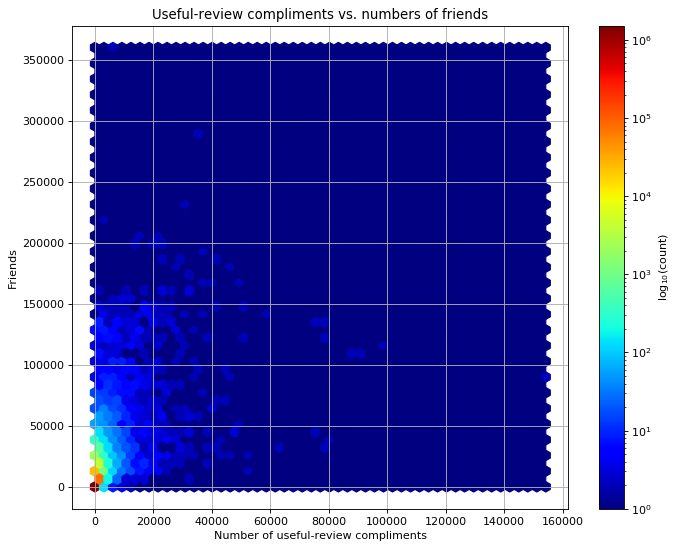

In [61]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["useful"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of useful-review compliments')
plt.ylabel('Friends')
plt.title('Useful-review compliments vs. numbers of friends')
plt.grid(True)

In [62]:
print("correlation coefficient: ", np.corrcoef([user["funny"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  0.40802328810412297


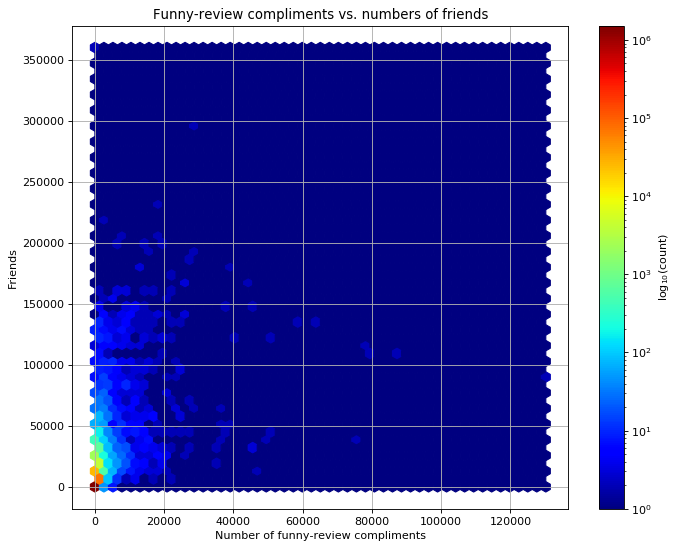

In [63]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["funny"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of funny-review compliments')
plt.ylabel('Friends')
plt.title('Funny-review compliments vs. numbers of friends')
plt.grid(True)

In [64]:
print("correlation coefficient: ", np.corrcoef([user["cool"] for user in users], [user["friends"] for user in users])[0][1])

correlation coefficient:  0.43177336159598884


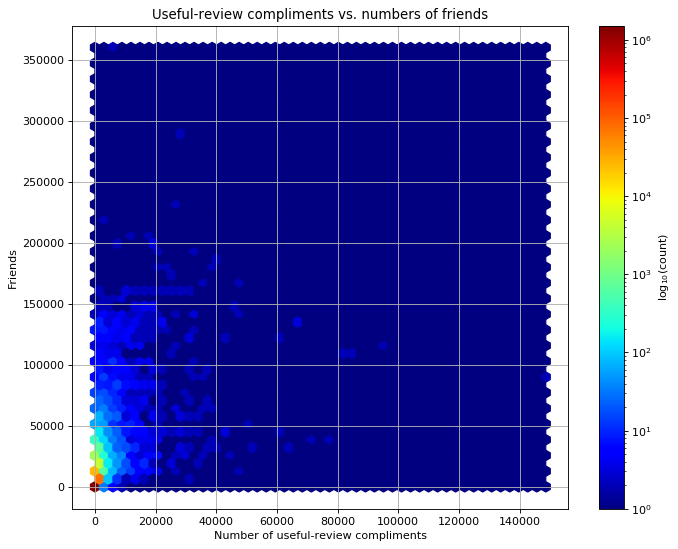

In [65]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# the histogram of the data
hb = plt.hexbin(
    [user["cool"] for user in users], [user["friends"] for user in users], 
    gridsize=50, cmap='jet', bins = 'log'
)

cb = fig.colorbar(hb)
cb.set_label('$\log_{10}($count$)$')

plt.xlabel('Number of useful-review compliments')
plt.ylabel('Friends')
plt.title('Useful-review compliments vs. numbers of friends')
plt.grid(True)

#### What did we learn?
* friend makers work harder at interacting with other people (potential friends),
* i.e., they upvote other users' reviews more frequently with 'more,' 'cool,' 'userful'
* friend makers are better at getting review-based compliments, cool, funny, hot, etc.
* friend makers do give higher stars, on average!
* over writers get more compliments for the 'profile,' 'list,' and 'more' categories,
* but 'more' means people want them to write more (not reviews, details),
* and 'profiles' and 'lists' don't have anything to do with writing reviews, which is what yelp is about!
* However, beyond any quality measure, sheer activity levels seem to be the most important, 
* so above all else, participate!

So, in summary, it appears that review contents and community activities have the most to do with making friends. This is not surprising&mdash;in a social environment, you make friends by being social and supporting the community! This is really the same as on all other social media! Specifically, if you want to be 'good' at social media don't just tweet your mundane everyday activities (like an over writer), put some thought/humor/life into the posts to appeal to other people. Also, it takes friends to make friends&mdash;you have to engage others with upvotes, etc., to get them to view your reviews and upvote you!

#### How can we learn more?
So far we have only looked at the individual user statistics. This has lead to some hypotheses about what gets people friends on Yelp!, but in order to test some of those hypotheses we would need to run other experiments, and most likely get other data. Specifically, if we think good/helpful/funny/hot reviews are the key to making friends, we need to do some text analysis on the unstructured review text.